[View in Colaboratory](https://colab.research.google.com/github/avault/higher-ed-exploration/blob/master/analysis.ipynb)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Plotting imports

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.use('PDF')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pu_colormaps as pu_cm
import matplotlib.transforms as transforms
import matplotlib.patheffects as path_effects

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# Default changes to matplotlib

# Make the x and y ticks bigger
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.major.width'] = 2

In [4]:
%matplotlib inline

# Load Data

In [5]:
times_data = pd.read_excel( 'data/time_world_university_rankings_2011-2016.xlsx' )

In [6]:
times_data

,World_Rank,University_Name,Country,Teaching_Rating,Inter_Outlook_Rating,Research_Rating,Citations_Rating,Industry_Income_Rating,Total_Score,Num_Students,Student/Staff_Ratio,%_Inter_Students,%_Female_Students,Year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27.0,33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,45,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57,91.2,18812.0,11.8,34.0,46,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34.0,46,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,36186.0,16.4,15.0,50,2011
8,9,Imperial College London,United Kingdom,89.2,90,94.5,88.3,92.9,90.6,15060.0,11.7,51.0,37,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,11751.0,4.4,20.0,50,2011


# Analyze the Data

In [7]:
# Convert strs to floats when necessary
processed_rankings = []
for rank in times_data['World_Rank'].values:
    if isinstance( rank, str ):
        processed_rankings.append( int( rank.split( '-' )[0] ) )
    else:
        processed_rankings.append( rank )

In [8]:
# Find and mask data where there's no total score
no_value = times_data['Total_Score'].values == '-'
rankings_ma = np.ma.masked_array( processed_rankings, no_value )
score_ma = np.ma.masked_array( times_data['Total_Score'].values, no_value )

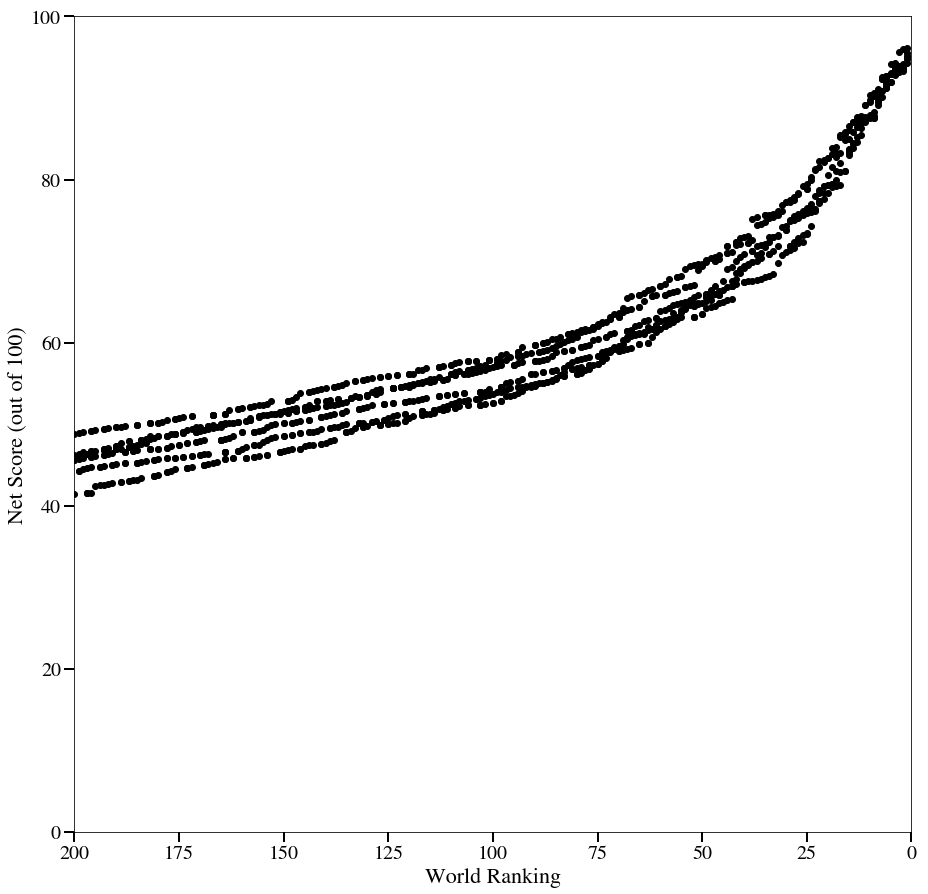

In [11]:
fig = plt.figure( figsize=(15,15), facecolor='white' )
ax = plt.gca()

ax.scatter(
    rankings_ma,
    score_ma,
    color = 'k',
)

ax.invert_xaxis()

ax.set_xlim( 200, 0 )
ax.set_ylim( 0, 100 )

ax.set_xlabel( 'World Ranking', fontsize=22 )
ax.set_ylabel( 'Net Score (out of 100)', fontsize=22)

In [12]:
fig.savefig( './score_vs_ranking.jpg' )

This is interesting... The score actually steepens with higher university rankings, instead of flattening.
This implies that low ranking colleges are all more likely to be similar, but that there's a real difference between top colleges. However, I'm not sure this is actually a real trend. The entire business model of having a ratings system is that the claim that there's a difference between top colleges. As such, there's no way those who rate colleges could afford to have similar ratings between all the top universities. This doesn't answer the question, therefore, of whether or not there really is a difference between top universities.

# Extensions
- Does the same trend persist for ratings other than the net rating?
- How does the above trend change according to country?
- What countries have the most universities with the highest scores?
- Is there a relationship between the number of students a university has and its ratings?
- Is there a relationship between the diversity of the university and its ratings?